In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
team_name = 'Manchester City'
df = pd.read_csv(f'../data/team_phases/{team_name}.csv')
df.head()

/var/folders/tv/_qfcls8d76jd1sp6y_8qsd700000gn/T/ipykernel_1449/640734795.py:2: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'../data/team_phases/{team_name}.csv')


,Unnamed: 0,carry_end_location,dribble_outcome,id,index,location,match_id,out,pass_angle,pass_assisted_shot_id,...,shot_statsbomb_xg,shot_type,tactics,team,team_id,timestamp,type,foul_won_penalty,pass_goal_assist,phase_id
0,14,NaN,NaN,f5a217d2-0ba0-49bb-9854-0c26fe2060ae,28,"[47.6, 44.4]",3754045,NaN,2.139644,NaN,...,NaN,NaN,NaN,Manchester City,36,00:00:17.793,Pass,NaN,NaN,0
1,919,NaN,NaN,60ad5e93-2411-4cb0-a750-988d0067ecfd,29,"[43.7, 50.5]",3754045,NaN,NaN,NaN,...,NaN,NaN,NaN,Manchester City,36,00:00:18.826,Ball Receipt*,NaN,NaN,0
2,15,NaN,NaN,c13b671d-4bfa-4a85-8ba3-a7253ab0cc5a,30,"[43.7, 50.5]",3754045,NaN,0.268366,NaN,...,NaN,NaN,NaN,Manchester City,36,00:00:18.828,Pass,NaN,NaN,0
3,920,NaN,NaN,94b03a78-6f28-4fc4-85ea-fb346e86dbf1,32,"[67.7, 54.9]",3754045,NaN,NaN,NaN,...,NaN,NaN,NaN,Manchester City,36,00:00:21.201,Ball Receipt*,NaN,NaN,0
4,2909,NaN,NaN,85cbd8ed-5355-4684-a2f3-90741b2c2504,34,"[50.1, 59.6]",3754045,NaN,NaN,NaN,...,NaN,NaN,NaN,Manchester City,36,00:00:22.792,Ball Recovery,NaN,NaN,1


In [3]:
phase_id = 0
lenghts = dict()
current_len = 0
max_len = -1
max_phase_id = -1
for i in range(len(df)):
    if df.iloc[i]['phase_id'] == phase_id:
        current_len += 1
    else:
        count = lenghts.get(current_len, 0) + 1
        lenghts[current_len] = count
        if current_len > max_len:
            max_len = current_len
            max_phase_id = phase_id
        phase_id += 1
        current_len = 1

max_len, max_phase_id

(134, 6996)

<BarContainer object of 25 artists>

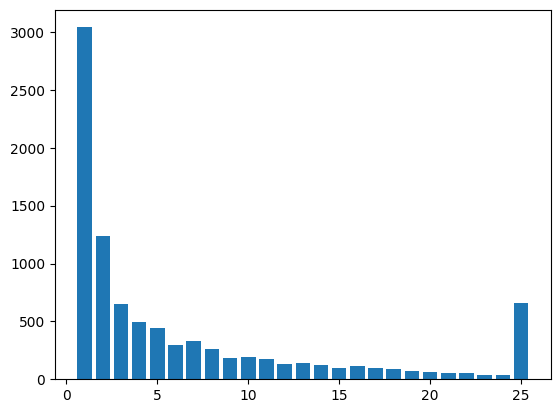

In [4]:
compact_limit = 25

xs = [i for i in range(1, compact_limit + 1)]
ys = [lenghts[i] for i in range(1, compact_limit)]
more25_count = 0
for i in range(compact_limit, max_len + 1):
    more25_count += lenghts.get(i, 0)
ys.append(more25_count)
plt.bar(xs, ys)

In [ ]:
events = dict()
current_len = 0
phase_id = 0
for i in range(len(df)):
    print(df.iloc[i]['phase_id'])
    if df.iloc[i]['phase_id'] == phase_id:
        current_len += 1
    elif current_len == 1:
        event_type = df.iloc[i - 1]['type']
        events[event_type] = events.get(event_type, 0) + 1
        phase_id += 1

In [11]:
events

{}